El método Monte Carlo fue desarrollado por los físicos y matemáticos Stanislaw Ulam (Polonia) y John Von Neumman (Hungría) para el diseño de la bomba de hidrógeno en el Laboratorio Nacional de Los Álamos (LANL). Paralelamente, Enrico Fermi  lo estudió paralelamente al estudiar la difusión de neutrones. En la clase de hoy, usted deberá desarrollar tres ejercicios similares para comprender el método de la integración de Monte Carlo y llegar a una ecuación relacionada con el cálculo de transporte de neutrones.

# Integración de Monte Carlo

La integración de Monte Carlo es un método no determinista para el cálculo de integrales. Primero, estudiaremos sus fundamentos teóricos y mostraremos aplicaciones prácticas para una dimensión y para varias dimensiones.

El valor promedio de una integral en un intervalo $[a,b]$ está dado por 

$$\begin{equation}
\mathbb{E}[f(x)] = \frac{1}{b-a}\int_a^b f(x) dx
\end{equation}$$

Llamaremos a esto la **media poblacional**. Similarmente, la **varianza poblacional** está dada por 

$$\begin{align*}
\mathbb{V}[f(x)] &= \mathbb{E}[f^2(x)] -\mathbb{E}[f(x)]^2 \\
\mathbb{V}[f(x)] &= \frac{1}{b-a}\int_a^b f^2(x) dx - \left(\frac{1}{b-a} \int_a^b f(x)dx \right)^2
\end{align*}$$

Esta última está relacionada con la **desviación estándar poblacional** mediante $\sigma = \sqrt{\mathbb{V}[f(x)]}$.

En estadística, es sencillamente impractico o hasta imposible medir la media y la varianza de toda la población por lo que se selecciona una muestra de tamaño $n$ para estimarlos. Para esto, se toman $x_0$, $x_1$,...,$x_{n-1}$ que sean *independientes e idénticamente distribuidos* o *iid* y se calcula la **media muestral** como 

$$\begin{align*} \overline{f} &= \frac{1}{n}\sum_{i=0}^{n-1}f(x_i) \end{align*}$$

Es facil ver que esta media muestral estima la media poblacional pues $\mathbb{E}[\overline{f}] = \mathbb{E}[f(x)]$, mientras que las varianzas están relacionadas por

$$\begin{align*} \mathbb{V}[\overline{f}] = \frac{1}{n} \mathbb{V} [f(x)] \end{align*}$$

Con lo que vemos que $\sigma_{\overline{f}} = \frac{1}{\sqrt{n}} \sigma_f$. En general vemos entonces que $\mathbb{E}[f(x)] = \overline{f} \pm \sigma_{\overline{f}}$


Por la ley de grandes número de estadística, entre más grande sea nuestro $n$, la media muestral aproxima mejor a la media poblacional. Es decir que cuando $n\to\infty$, 

$$
\begin{align*}
\mathbb{E}[f(x)] &\approx \overline{f} \\
\frac{1}{b-a} \int_a^b f(x) dx &\approx \frac{1}{n} \sum_{i=0}^{n-1} f(x_i) \\
\int_a^b f(x) dx &\approx \frac{b-a}{n} \sum_{i=0}^{n-1} f(x_i)
\end{align*}
$$

con un intervalo de confianza de $\pm (b-a) \sigma_{\overline{f}}$, esto último dado por 

$$ (b-a) \sigma_{\overline{f}} = \frac{b-a}{\sqrt{n-1}} \sqrt{\frac{1}{n} \sum_{i=0}^{n-1}f^2(x) - \left[ \frac{1}{n} \sum_{i=0}^{n-1} f(x_i) \right]^2 } $$

## Implementado el método de Monte Carlo en 1D
Veamos entonces un ejemplo de implementación para la integral 

$$ \begin{align*} 
I &= \int_0^{\pi} e^{-x} \sin x dx
\end{align*}$$

El método de Monte Carlo nos está diciendo que debemos tomar una muestra aleatoria de variables $x_i$. Para una primera aproximacion, tomaremos muestras que vengan de una distribución de probabilidad uniforme. Esto se puede hacer en Python con `np.random`

In [197]:
import matplotlib.pyplot as plt
import numpy as np

N = 1000000
a = 0
b = np.pi
x = np.random.uniform(a,b,N) #N es el número de muestras aleatorias que tomará

In [198]:
def func_integrate(x):
    return np.exp(-x)*np.sin(x)

Calculamos entonces $f(x_i)$ que a su vez es una distribución aleatoria,

In [199]:
fi = func_integrate(x)

Con lo que podemos calcular nuestra integral utilizando $I \approx \frac{b-a}{N} \sum f(x_i)$

In [200]:
I = (b-a)*sum(fi)/N
print(I)

0.5214353227410108


El valor analítico de la integral es $\frac{1}{2} (1+e^{-\pi})$, es decir

In [201]:
Iteo = 0.5*(1+np.exp(-np.pi))
print(f'El valor teórico es: {Iteo:.6f} y valor utilizando Monte Carlo es {I:.6f}, con un error porcentual de: {np.abs(1-I/Iteo): .6%}')

El valor teórico es: 0.521607 y valor utilizando Monte Carlo es 0.521435, con un error porcentual de:  0.032905%


#### **Ejercicio 4.1**

Grafique el error porcentual para la integral $\int_0^{\pi} e^{-x} \sin x dx$ utilizando el método de Monte Carlo para su cálculo en función del número de muestras $N$ de este método. En la misma gráfica, muestra la función $\frac{1}{\sqrt{N}}$. Esta es la cota superior del error porcentual.

Text(0, 0.5, 'Error Porcentual')

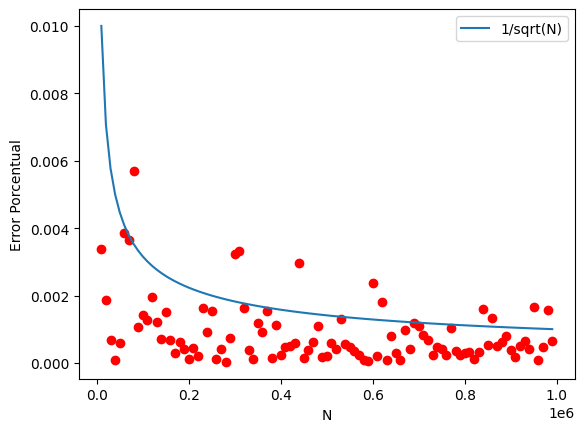

In [202]:
def Prueba(x):
    return 1/np.sqrt(x)
Xplot=np.arange(10000,N,10000)
Yplot=Prueba(Xplot)
#print(Yplot)
for i in Xplot:
    fi=func_integrate(np.random.uniform(a,b,i))
    porcentaje=np.abs(1-((b-a)*sum(fi)/i)/Iteo)
    plt.plot(i,porcentaje,"ro")
plt.plot(Xplot,Yplot,label="1/sqrt(N)")
plt.legend()
plt.xlabel('N')
plt.ylabel('Error Porcentual')


## Calculando integrales de orden superior

Observe el vídeo https://www.youtube.com/watch?v=M34TO71SKGk.

- ¿Cómo se relaciona con el método de MonteCarlo?
- ¿Cómo recrear el experimento utilizando Python?

Observe que Dianna y Derek están calculando el área de un círculo, es decir

$$
\begin{align*}
A &= \int_{D}  dA = \iint_{D} 1 dx dy
\end{align*}
$$

donde $D = \{x,y: x^2+y^2 < R^2 \}$. En este caso estamos integrando una función constante y debemos escoger puntos aleatorios que ocurran estén en la región de integración.

In [203]:
R = 7
N = 10000
x = np.random.uniform(-R,R,N)
y = np.random.uniform(-R,R,N)

suma = 0

for i in range(N):
    if x[i]**2+y[i]**2<R**2:
        suma += 1 #Se suma uno puesto que la función es 1

In [204]:
I = (2*R)**2*suma/N
I

153.1152

In [205]:
np.pi*R**2

153.93804002589985

Observe que obtenemos el mismo resultado cuando hacemos la transformación de coordenadas $dA=rdrd\theta$,

$$
\begin{align*}
A &= \int_{D}  dA = \int_{0}^{2\pi} \int_{0}^{R} r dr d\theta
\end{align*}
$$

In [206]:
r = np.random.uniform(0,R,N)
theta = np.random.uniform(0,2*np.pi,N)

area_func = lambda r: x
f = area_func(r)

sum(f)*R*2*np.pi/N

-0.8293668076468975

#### **Ejercicio 4.2**

Determine la masa, centro de masa y momento de inercia que ocupa la región $D$ y tiene la función de densidad dada, donde $D$ está encerrada por el lazo derecho de la rosa de cuatro pétalos $r=\cos 2\theta$ con $\rho(x,y) = x^2+y^2$.

#### **Ejercicio 4.3**


La ecuación del transporte de neutrones requiere calcular la tasa de producción de neutrones por medio de la integral

\begin{align*}
    \int \int \int_\Omega \sin(x^2+y^2+z^2) e^{x^2+y^2 + z^2} dV
\end{align*}

donde $\Omega$ es la esfera de radio $1$ centrada en el origen. Utilizando el método de Monte Carlo para $N$ puntos aleatorios, aproxime el valor de esta integral.

In [207]:
R = 1
N = 10000
x = np.random.uniform(-R,R,N)
y = np.random.uniform(-R,R,N)
z = np.random.uniform(-R,R,N)

suma = 0

for i in range(N):
    if x[i]**2+y[i]**2+z[i]**2<=R**2:
        suma += np.sin((x[i]**2+y[i]**2+z[i]**2))*np.exp(x[i]**2+y[i]**2+z[i]**2)

In [208]:
(8/N)*suma

4.772199367931611